# Import Libraries for notebook

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time

# Gather Data

### Source 1: read in twitter-archive-enhanced.csv file

In [388]:
#read in csv file
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [389]:
#view dataframe sample
tw_arch.size

40052

### Source 2: download image_predictions.tsv file

In [4]:
#url of source data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#store the http request 
response = requests.get(url)

#write the http response to a TSV file 
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)



In [390]:
#read file to dataframe
img_pred = pd.read_csv('image_predictions.tsv',sep='\t')
#check image_predictions.tsv downloaded correctly
img_pred.sample(5)

tweet_id                                          jpg_url  \
445   674646392044941312  https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg   
1176  737678689543020544  https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg   
2015  879492040517615616  https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg   
1739  822462944365645825  https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg   
485   675489971617296384  https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg   

      img_num                           p1   p1_conf  p1_dog           p2  \
445         1        flat-coated_retriever  0.837448    True  groenendael   
1176        1                     Pembroke  0.935307    True     Cardigan   
2015        1  German_short-haired_pointer  0.479896    True       vizsla   
1739        3                   Pomeranian  0.960199    True      Samoyed   
485         1  West_Highland_white_terrier  0.139613    True    seat_belt   

       p2_conf  p2_dog                    p3   p3_conf  p3_dog  
445   0.086166    True    Labrador_retriever  0.016052    True  
1176  0.049874    True             Chihuahua  0.011603    True  
2015  0.124353    True            bath_towel  0.073320   False  
1739  0.023056    True           Maltese_dog  0.008945    True  
485   0.118647   False  Old_English_sheepdog  0.093952    True

### Source 3: Gathering from tweetpy api

In [13]:
### API credentials
consumer_key = ####
consumer_secret = ####
access_token = ####
access_token_secret = ####

##create authentication handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

##connect to api
api = tweepy.API(auth, wait_on_rate_limit=True)

##get list of tweet id's from twitter-archive-enhanced.csv
tweet_id_list = tw_arch['tweet_id'].tolist()

#write api responses to text file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_id_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success: " + str(tweet_id))
            json.dump(tweet._json, outfile)
            outfile.write('\n')
             
        except:
            print("Failure: " + str(tweet_id))
            pass

Success: 892420643555336193
Success: 892177421306343426
Success: 891815181378084864
Success: 891689557279858688
Success: 891327558926688256
Success: 891087950875897856
Success: 890971913173991426
Success: 890729181411237888
Success: 890609185150312448
Success: 890240255349198849
Success: 890006608113172480
Success: 889880896479866881
Success: 889665388333682689
Success: 889638837579907072
Success: 889531135344209921
Success: 889278841981685760
Success: 888917238123831296
Success: 888804989199671297
Success: 888554962724278272
Failure: 888202515573088257
Success: 888078434458587136
Success: 887705289381826560
Success: 887517139158093824
Success: 887473957103951883
Success: 887343217045368832
Success: 887101392804085760
Success: 886983233522544640
Success: 886736880519319552
Success: 886680336477933568
Success: 886366144734445568
Success: 886267009285017600
Success: 886258384151887873
Success: 886054160059072513
Success: 885984800019947520
Success: 885528943205470208
Success: 88551897152

Success: 837820167694528512
Success: 837482249356513284
Success: 837471256429613056
Failure: 837366284874571778
Success: 837110210464448512
Failure: 837012587749474308
Success: 836989968035819520
Success: 836753516572119041
Success: 836677758902222849
Success: 836648853927522308
Success: 836397794269200385
Success: 836380477523124226
Success: 836260088725786625
Success: 836001077879255040
Success: 835685285446955009
Success: 835574547218894849
Success: 835536468978302976
Success: 835309094223372289
Success: 835297930240217089
Success: 835264098648616962
Success: 835246439529840640
Success: 835172783151792128
Success: 835152434251116546
Success: 834931633769889797
Success: 834786237630337024
Success: 834574053763584002
Success: 834477809192075265
Success: 834458053273591808
Success: 834209720923721728
Success: 834167344700198914
Success: 834089966724603904
Success: 834086379323871233
Success: 833863086058651648
Success: 833826103416520705
Success: 833732339549220864
Success: 83372290175

Success: 799774291445383169
Success: 799757965289017345
Success: 799422933579902976
Success: 799308762079035393
Success: 799297110730567681
Success: 799063482566066176
Success: 798933969379225600
Success: 798925684722855936
Success: 798705661114773508
Success: 798701998996647937
Success: 798697898615730177
Success: 798694562394996736
Success: 798686750113755136
Success: 798682547630837760
Success: 798673117451325440
Success: 798665375516884993
Success: 798644042770751489
Success: 798628517273620480
Success: 798585098161549313
Success: 798576900688019456
Success: 798340744599797760
Success: 798209839306514432
Success: 797971864723324932
Success: 797545162159308800
Success: 797236660651966464
Success: 797165961484890113
Success: 796904159865868288
Success: 796865951799083009
Success: 796759840936919040
Success: 796563435802726400
Success: 796484825502875648
Success: 796387464403357696
Success: 796177847564038144
Success: 796149749086875649
Success: 796125600683540480
Success: 79611644841

Success: 760641137271070720
Success: 760539183865880579
Success: 760521673607086080
Success: 760290219849637889
Success: 760252756032651264
Success: 760190180481531904
Success: 760153949710192640
Success: 759943073749200896
Failure: 759923798737051648
Success: 759846353224826880
Success: 759793422261743616
Failure: 759566828574212096
Success: 759557299618865152
Success: 759447681597108224
Success: 759446261539934208
Success: 759197388317847553
Success: 759159934323924993
Success: 759099523532779520
Success: 759047813560868866
Success: 758854675097526272
Success: 758828659922702336
Success: 758740312047005698
Success: 758474966123810816
Success: 758467244762497024
Success: 758405701903519748
Success: 758355060040593408
Success: 758099635764359168
Success: 758041019896193024
Success: 757741869644341248
Success: 757729163776290825
Success: 757725642876129280
Success: 757611664640446465
Failure: 757597904299253760
Success: 757596066325864448
Success: 757400162377592832
Success: 75739310980

Success: 720389942216527872
Success: 720340705894408192
Success: 720059472081784833
Success: 720043174954147842
Success: 719991154352222208
Success: 719704490224398336
Success: 719551379208073216
Success: 719367763014393856
Success: 719339463458033665
Success: 719332531645071360
Success: 718971898235854848
Success: 718939241951195136
Success: 718631497683582976
Success: 718613305783398402
Success: 718540630683709445
Success: 718460005985447936
Success: 718454725339934721
Success: 718246886998687744
Success: 718234618122661888
Success: 717841801130979328
Success: 717790033953034240
Success: 717537687239008257
Success: 717428917016076293
Success: 717421804990701568
Success: 717047459982213120
Success: 717009362452090881
Success: 716802964044845056
Success: 716791146589110272
Success: 716730379797970944
Success: 716447146686459905
Success: 716439118184652801
Success: 716285507865542656


Rate limit reached. Sleeping for: 669


Success: 716080869887381504
Success: 715928423106027520
Success: 715758151270801409
Success: 715733265223708672
Success: 715704790270025728
Success: 715696743237730304
Success: 715680795826982913
Success: 715360349751484417
Success: 715342466308784130
Success: 715220193576927233
Success: 715200624753819648
Success: 715009755312439296
Success: 714982300363173890
Success: 714962719905021952
Success: 714957620017307648
Success: 714631576617938945
Success: 714606013974974464
Success: 714485234495041536
Success: 714258258790387713
Success: 714251586676113411
Success: 714214115368108032
Success: 714141408463036416
Success: 713919462244790272
Success: 713909862279876608
Success: 713900603437621249
Success: 713761197720473600
Success: 713411074226274305
Success: 713177543487135744
Success: 713175907180089344
Success: 712809025985978368
Success: 712717840512598017
Success: 712668654853337088
Success: 712438159032893441
Success: 712309440758808576
Success: 712097430750289920
Success: 71209274562

Success: 692423280028966913
Success: 692417313023332352
Success: 692187005137076224
Success: 692158366030913536
Success: 692142790915014657
Success: 692041934689402880
Success: 692017291282812928
Success: 691820333922455552
Success: 691793053716221953
Success: 691756958957883396
Success: 691675652215414786
Success: 691483041324204033
Success: 691459709405118465
Success: 691444869282295808
Success: 691416866452082688
Success: 691321916024623104
Success: 691096613310316544
Success: 691090071332753408
Success: 690989312272396288
Success: 690959652130045952
Success: 690938899477221376
Success: 690932576555528194
Success: 690735892932222976
Success: 690728923253055490
Success: 690690673629138944
Success: 690649993829576704
Success: 690607260360429569
Success: 690597161306841088
Success: 690400367696297985
Success: 690374419777196032
Success: 690360449368465409
Success: 690348396616552449
Success: 690248561355657216
Success: 690021994562220032
Success: 690015576308211712
Success: 69000506050

Success: 677530072887205888
Success: 677335745548390400
Success: 677334615166730240
Success: 677331501395156992
Success: 677328882937298944
Success: 677314812125323265
Success: 677301033169788928
Success: 677269281705472000
Success: 677228873407442944
Success: 677187300187611136
Success: 676975532580409345
Success: 676957860086095872
Success: 676949632774234114
Success: 676948236477857792
Success: 676946864479084545
Success: 676942428000112642
Success: 676936541936185344
Success: 676916996760600576
Success: 676897532954456065
Success: 676864501615042560
Success: 676821958043033607
Success: 676819651066732545
Success: 676811746707918848
Success: 676776431406465024
Success: 676617503762681856
Success: 676613908052996102
Success: 676606785097199616
Success: 676603393314578432
Success: 676593408224403456
Success: 676590572941893632
Success: 676588346097852417
Success: 676582956622721024
Success: 676575501977128964
Success: 676533798876651520
Success: 676496375194980353
Success: 67647063908

Success: 670811965569282048
Success: 670807719151067136
Success: 670804601705242624
Success: 670803562457407488
Success: 670797304698376195
Success: 670792680469889025
Success: 670789397210615808
Success: 670786190031921152
Success: 670783437142401025
Success: 670782429121134593
Success: 670780561024270336
Success: 670778058496974848
Success: 670764103623966721
Success: 670755717859713024
Success: 670733412878163972
Success: 670727704916926465
Success: 670717338665226240
Success: 670704688707301377
Success: 670691627984359425
Success: 670679630144274432
Success: 670676092097810432


Rate limit reached. Sleeping for: 665


Success: 670668383499735048
Success: 670474236058800128
Success: 670468609693655041
Success: 670465786746662913
Success: 670452855871037440
Success: 670449342516494336
Success: 670444955656130560
Success: 670442337873600512
Success: 670435821946826752
Success: 670434127938719744
Success: 670433248821026816
Success: 670428280563085312
Success: 670427002554466305
Success: 670421925039075328
Success: 670420569653809152
Success: 670417414769758208
Success: 670411370698022913
Success: 670408998013820928
Success: 670403879788544000
Success: 670385711116361728
Success: 670374371102445568
Success: 670361874861563904
Success: 670338931251150849
Success: 670319130621435904
Success: 670303360680108032
Success: 670290420111441920
Success: 670093938074779648
Success: 670086499208155136
Success: 670079681849372674
Success: 670073503555706880
Success: 670069087419133954
Success: 670061506722140161
Success: 670055038660800512
Success: 670046952931721218
Success: 670040295598354432
Success: 67003718982

In [391]:
#Check that api call worked and I can read in json file
data = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data.append(json.loads(line))

#test data read in by creating dataframe
tweet_json = pd.DataFrame(data)
tweet_json.tail()

created_at                  id              id_str  \
2320  Mon Nov 16 00:24:50 +0000 2015  666049248165822465  666049248165822465   
2321  Mon Nov 16 00:04:52 +0000 2015  666044226329800704  666044226329800704   
2322  Sun Nov 15 23:21:54 +0000 2015  666033412701032449  666033412701032449   
2323  Sun Nov 15 23:05:30 +0000 2015  666029285002620928  666029285002620928   
2324  Sun Nov 15 22:32:08 +0000 2015  666020888022790149  666020888022790149   

                                              full_text  truncated  \
2320  Here we have a 1949 1st generation vulpix. Enj...      False   
2321  This is a purebred Piers Morgan. Loves to Netf...      False   
2322  Here is a very happy pup. Big fan of well-main...      False   
2323  This is a western brown Mitsubishi terrier. Up...      False   
2324  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
2320           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2321           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2322           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2323           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2324           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
2320  {'media': [{'id': 666049244999131136, 'id_str'...   
2321  {'media': [{'id': 666044217047650304, 'id_str'...   
2322  {'media': [{'id': 666033409081393153, 'id_str'...   
2323  {'media': [{'id': 666029276303482880, 'id_str'...   
2324  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
2320  <a href="http://twitter.com/download/iphone" r...   
2321  <a href="http://twitter.com/download/iphone" r...   
2322  <a href="http://twitter.com/download/iphone" r...   
2323  <a href="http://twitter.com/download/iphone" r...   
2324  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ... favorited  retweeted possibly_sensitive  \
2320                    NaN  ...     False      False              False   
2321                    NaN  ...     False      False              False   
2322                    NaN  ...     False      False              False   
2323                    NaN  ...     False      False              False   
2324                    NaN  ...     False      False              False   

     possibly_sensitive_appealable lang retweeted_status quoted_status_id  \
2320                         False   en              NaN              NaN   
2321                         False   en              NaN              NaN   
2322                         False   en              NaN              NaN   
2323                         False   en              NaN              NaN   
2324                         False   en              NaN              NaN   

     quoted_status_id_str quoted_status_permalink  quoted_status  
2320                  NaN                     NaN            NaN  
2321                  NaN                     NaN            NaN  
2322                  NaN                     NaN            NaN  
2323                  NaN                     NaN            NaN  
2324                  NaN                     NaN            NaN  

[5 rows x 32 columns]

# Assessing Data

### twitter-archive-enhanced

##### Cleaning observations
- name column contains values such as 'a' and 'The' that are not names, make null
- timestamp column is not a datetime
- name needs to be renamed to something more meaningful. dog_name 
- remove retweets from dataset
- name of Shawwn is spelt incorrectly
- floofer, pupper, puppo and doggo columns should be boolean values


In [55]:
#timestamp field is not a datetime datatype
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [65]:
tw_arch.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
780   775733305207554048                    NaN                  NaN   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1162  723688335806480385                    NaN                  NaN   
1951  673686845050527744                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   

                      timestamp  \
780   2016-09-13 16:30:07 +0000   
1479  2016-01-30 23:51:19 +0000   
1162  2016-04-23 01:41:59 +0000   
1951  2015-12-07 02:13:55 +0000   
43    2017-07-09 21:29:42 +0000   

                                                 source  \
780   <a href="http://twitter.com/download/iphone" r...   
1479  <a href="http://twitter.com/download/iphone" r...   
1162  <a href="http://twitter.com/download/iphone" r...   
1951  <a href="http://twitter.com/download/iphone" r...   
43    <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
780   This is Anakin. He strives to reach his full d...                  NaN   
1479  Personally I'd give him an 11/10. Not sure why...                  NaN   
1162  This is Reginald. He starts screaming at rando...                  NaN   
1951  This is George. He's upset that the 4th of Jul...                  NaN   
43    Meet Yogi. He doesn't have any important dog m...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
780                        NaN                        NaN   
1479                       NaN                        NaN   
1162                       NaN                        NaN   
1951                       NaN                        NaN   
43                         NaN                        NaN   

                                          expanded_urls  rating_numerator  \
780   https://twitter.com/dog_rates/status/775733305...                11   
1479                                                NaN                11   
1162  https://twitter.com/dog_rates/status/723688335...                12   
1951  https://twitter.com/dog_rates/status/673686845...                11   
43    https://twitter.com/dog_rates/status/884162670...                12   

      rating_denominator      name  doggo floofer pupper puppo  
780                   10    Anakin  doggo    None   None  None  
1479                  10      None   None    None   None  None  
1162                  10  Reginald   None    None   None  None  
1951                  10    George   None    None   None  None  
43                    10      Yogi  doggo    None   None  None

In [78]:
#nones in floofer, pupper, puppo and doggo columns should be boolean values
tw_arch[['floofer', 'pupper', 'puppo', 'doggo']].describe()

floofer pupper puppo doggo
count     2356   2356  2356  2356
unique       2      2     2     2
top       None   None  None  None
freq      2346   2099  2326  2259

### Image Predictions tsv

##### Cleaning observations
- replace underscores in  prediction text with blank space
- make prediction text lower case

##### Tidiness observations
- p columns should be condensed to prediction, prediction_confidence, prediction_dog

In [71]:
#img_pred.info()
print('duplicate tweet ids? ' + str(img_pred['tweet_id'].duplicated().any()))
print(img_pred.info())
img_pred.sample(5)



duplicate tweet ids?False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


tweet_id                                          jpg_url  \
1040  712092745624633345  https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg   
41    666701168228331520  https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
627   680836378243002368  https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg   
1861  842535590457499648  https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg   
1294  751830394383790080  https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg   

      img_num                  p1   p1_conf  p1_dog                 p2  \
1040        1         triceratops  0.235373   False              llama   
41          1  Labrador_retriever  0.887707    True          Chihuahua   
627         3            Pembroke  0.427781    True  Shetland_sheepdog   
1861        1            Pembroke  0.685084    True           Cardigan   
1294        1                chow  0.703569    True         Pomeranian   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
1040  0.153126   False  three-toed_sloth  0.111840   False  
41    0.029307    True    French_bulldog  0.020756    True  
627   0.160669    True        Pomeranian  0.111250    True  
1861  0.314608    True           basenji  0.000160    True  
1294  0.076637    True       Siamese_cat  0.045959   False

### twitter_json.txt

##### Cleaning observations
- none as only requiring columns thats needed

##### tidiness observations
- join retweet_count and favourite count data on to twitter-archive-enhanced


In [61]:
tweet_json = tweet_json[['id','retweet_count','favorite_count']]

#tweet_json.info()
tweet_json

id  retweet_count  favorite_count
0     892420643555336193           6946           33590
1     892177421306343426           5249           29136
2     891815181378084864           3459           21922
3     891689557279858688           7156           36646
4     891327558926688256           7694           35034
...                  ...            ...             ...
2320  666049248165822465             36              88
2321  666044226329800704            114             245
2322  666033412701032449             36             100
2323  666029285002620928             39             112
2324  666020888022790149            418            2275

[2325 rows x 3 columns]

# Cleaning Data

In [392]:
### make copies of dataframes

### twitter-archive-enhanced.csv
tw_arch_clean = tw_arch
### Image_Predictions.tsv data
img_pred_clean = img_pred
### tweet_json.txt data
tweet_json_clean = tweet_json

## Tidiness tasks

###### Tidiness task 1 - text_json.txt


###### Define
- using pandas merge functionality join retweet_count and favorite_count data on to twitter-archive-enhanced dataframe using the tweet_id as the joining key


###### Code

In [393]:
##  join retweet_count and favorite_count

#condense dataframe to only the data that is required
tweet_json_clean = tweet_json_clean[['id','retweet_count','favorite_count']]
#rename ID column to tweet_id to make the merge easier
tweet_json_clean = tweet_json_clean.rename(columns={'id': 'tweet_id'})

#merge dataframes
tw_arch_clean = tw_arch_clean.merge(tweet_json_clean, on='tweet_id', how='left')

###### Test

In [394]:
## check merge performed correctly
print(tw_arch_clean.count())
print(tw_arch_clean.info())

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
retweet_count                 2325
favorite_count                2325
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null

###### Tidiness task 2 - img_predictions.tsv


###### Define
- By splitting the img_pred_clean dataframe into 3 smaller data frames based on the in the columns belong to predictions 1,2 or 3 then I can concatenate them back together to create one longer dataframe thats not as wide. This means each prediction or observation becomes a row, rather than a new set of columns.

##### Code

In [395]:
## p columns should be condensed to prediction, prediction_confidence, prediction_dog

##split dataframe into 3 dataframes for each set of prediction columns
img_pred_clean_co1 = img_pred_clean[['tweet_id','jpg_url','img_num','p1','p1_conf','p1_dog']]
img_pred_clean_co1 = img_pred_clean_co1.rename(columns={'p1': 'prediction', 'p1_conf': 'prediction_confidence', 'p1_dog':'is_dog' })

img_pred_clean_co2 = img_pred_clean[['tweet_id','jpg_url','img_num','p2','p2_conf','p2_dog']]
img_pred_clean_co2 = img_pred_clean_co2.rename(columns={'p2': 'prediction', 'p2_conf': 'prediction_confidence', 'p2_dog':'is_dog' })

img_pred_clean_co3 = img_pred_clean[['tweet_id','jpg_url','img_num','p3','p3_conf','p3_dog']]
img_pred_clean_co3 = img_pred_clean_co2.rename(columns={'p3': 'prediction', 'p3_conf': 'prediction_confidence', 'p3_dog':'is_dog' })


##concat dataframes
img_pred_clean = pd.concat([img_pred_clean_co1, img_pred_clean_co2, img_pred_clean_co3])



###### Test

In [396]:
img_pred_clean = img_pred_clean[['tweet_id','jpg_url','img_num', 'prediction', 'prediction_confidence', 'is_dog']]
img_pred_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num              prediction  prediction_confidence  is_dog  
0           1  Welsh_springer_spaniel               0.465074    True  
1           1                 redbone               0.506826    True  
2           1         German_shepherd               0.596461    True  
3           1     Rhodesian_ridgeback               0.408143    True  
4           1      miniature_pinscher               0.560311    True  
...       ...                     ...                    ...     ...  
2070        2        English_springer               0.225770    True  
2071        1      Labrador_retriever               0.168086    True  
2072        1                malamute               0.078253    True  
2073        1                Pekinese               0.090647    True  
2074        1                   bagel               0.085851   False  

[6225 rows x 6 columns]

## Cleaning tasks

###### twitter-archive-enhanced.csv
- name column contains values such as 'a' and 'The' that are not names, make null
- timestamp column is not a datetime
- name needs to be renamed to something more meaningful. dog_name 
- remove retweets from dataset
- name of Shawwn is spelt incorrectly
- floofer, pupper, puppo and doggo columns should be boolean values
- after tidiness join task performed favorite_count and retweet_count is now float64

### clean task 1  - name column contains values such as 'a' and 'The' that are not names, make null

##### Define
- use the pandas replace function to remove values in the name column that equal 'a' and 'the'

###### Code

In [397]:
#replace name fields column values of 'the' & 'a' to null
tw_arch_clean['name'].replace('a', np.nan, inplace=True)
tw_arch_clean['name'].replace('the', np.nan, inplace=True)

###### Test

In [398]:
#test if any rows exist for those field values.
print('a' in tw_arch_clean['name'].values)
print('the' in tw_arch_clean['name'].values)
print('Reginald' in tw_arch_clean['name'].values)

False
False
True


### clean task 2  - timestamp column is not a datetime

###### Define
- convert the timestamp field to a datetime data type using the pandas to_datetime function

###### Code

In [399]:
#convert timestamp field to a datetime
tw_arch_clean['timestamp'] = pd.to_datetime(tw_arch_clean['timestamp'], infer_datetime_format=True  )

###### Test

In [400]:
#check a few rows are a date time
print(tw_arch_clean['timestamp'][0:5])
tw_arch_clean.info()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retw

### clean task 3  - name needs to be renamed to something more meaningful. dog_name

###### Define
- column name could be renamed to something more meaningful, using the panas rename functionality to rename 'name' to 'dog_name'

###### Code

In [401]:
tw_arch_clean.rename(columns={'name':'dog_name'}, inplace=True)

###### Test

In [402]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### clean task 4  - remove retweets from dataset

###### Define
- filter out any retweet data from the dataframe using the retweeted_status_id to determine wether the row is a RT or not. If the field value is NA then its not a retweet. using the pandas loc function combined with isna to return only rows where retweeted_status_id is na

##### Code

In [403]:
tw_arch_clean = tw_arch_clean.loc[tw_arch_clean['retweeted_status_id'].isna()]

##### Test

In [404]:
## Test that data was filtered out
tw_arch_clean.loc[tw_arch_clean['retweeted_status_id'].notna()] 

#Check the tweet texts that contain 'RT' are not actually retweets.
tw_arch_clean.loc[tw_arch_clean['text'].str.contains('RT', case=True, regex=True) == True]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
80    877316821321428993                    NaN                  NaN   
959   751251247299190784                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   
1037  744709971296780288                    NaN                  NaN   
1116  732585889486888962                    NaN                  NaN   
1182  718971898235854848                    NaN                  NaN   
1286  708400866336894977                    NaN                  NaN   
1650  683515932363329536                    NaN                  NaN   
1766  678399652199309312                    NaN                  NaN   
1860  675489971617296384                    NaN                  NaN   
1991  672622327801233409                    NaN                  NaN   

                     timestamp  \
80   2017-06-21 00:06:44+00:00   
959  2016-07-08 03:07:09+00:00   
985  2016-07-02 03:00:36+00:00   
1037 2016-06-20 01:54:27+00:00   
1116 2016-05-17 14:57:41+00:00   
1182 2016-04-10 01:20:33+00:00   
1286 2016-03-11 21:15:02+00:00   
1650 2016-01-03 05:11:12+00:00   
1766 2015-12-20 02:20:55+00:00   
1860 2015-12-12 01:38:53+00:00   
1991 2015-12-04 03:43:54+00:00   

                                                 source  \
80    <a href="http://twitter.com/download/iphone" r...   
959   <a href="http://twitter.com/download/iphone" r...   
985   <a href="http://vine.co" rel="nofollow">Vine -...   
1037  <a href="http://twitter.com/download/iphone" r...   
1116  <a href="http://twitter.com/download/iphone" r...   
1182  <a href="http://twitter.com/download/iphone" r...   
1286  <a href="http://vine.co" rel="nofollow">Vine -...   
1650  <a href="http://vine.co" rel="nofollow">Vine -...   
1766  <a href="http://twitter.com/download/iphone" r...   
1860  <a href="http://twitter.com/download/iphone" r...   
1991  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
80    Meet Dante. At first he wasn't a fan of his ne...                  NaN   
959   This is Gilbert. He's being chased by a battal...                  NaN   
985   This is Boomer. He's self-baptizing. Other dog...                  NaN   
1037  This is Harvey. He's stealthy af. 10/10 would ...                  NaN   
1116  When your teacher agreed on 10,000 RTs and no ...                  NaN   
1182  This is Sadie. She is prepared for battle. 10/...                  NaN   
1286  RT if you are as ready for summer as this pup ...                  NaN   
1650  HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...                  NaN   
1766  This made my day. 12/10 please enjoy https://t...                  NaN   
1860  RT until we find this dog. Clearly a cool dog ...                  NaN   
1991  This lil pupper is sad because we haven't foun...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
80                         NaN                        NaN   
959                        NaN                        NaN   
985                        NaN                        NaN   
1037                       NaN                        NaN   
1116                       NaN                        NaN   
1182                       NaN                        NaN   
1286                       NaN                        NaN   
1650                       NaN                        NaN   
1766                       NaN                        NaN   
1860                       NaN                        NaN   
1991                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
80    https://twitter.com/dog_rates/status/877316821...                13   
959   https://twitter.com/dog_rates/status/751251247...                10   
985                       https://vine.co/v/5ztZvHgI17r                11   
1037  https://twitter.com/dog_r

### clean task 5  - the dog name of Shawwn is spelt incorrectly

###### Define
- The dogs name has been spelt incorrectly with, using pandas 'at' function to change the value

###### Code

In [405]:
tw_arch_clean.at[2152,'dog_name']='Shawn'



###### Test

In [406]:
# check that the value has changed to Shawn
tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'Shawn']
tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'Shawwn']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, dog_name, doggo, floofer, pupper, puppo, retweet_count, favorite_count]
Index: []

### clean task 6  - nones in floofer, pupper, puppo and doggo columns should be boolean values

###### Define
- Columns  floofer, pupper, puppo and doggo should be booleans, use the replace function to change 'Nones' to False and values to True

###### Code

In [407]:
tw_arch_clean['doggo'].replace({'doggo': True, 'None': False}, inplace=True)
tw_arch_clean['floofer'].replace({'floofer': True, 'None': False}, inplace=True)
tw_arch_clean['pupper'].replace({'pupper': True, 'None': False}, inplace=True)
tw_arch_clean['puppo'].replace({'puppo': True, 'None': False}, inplace=True)

###### Test

In [408]:
print(tw_arch_clean.info())
tw_arch_clean.sample(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
950   752173152931807232                    NaN                  NaN   
2266  667530908589760512                    NaN                  NaN   
973   750071704093859840                    NaN                  NaN   
2101  670691627984359425                    NaN                  NaN   
875   761227390836215808                    NaN                  NaN   

                     timestamp  \
950  2016-07-10 16:10:29+00:00   
2266 2015-11-20 02:32:25+00:00   
973  2016-07-04 21:00:04+00:00   
2101 2015-11-28 19:51:59+00:00   
875  2016-08-04 15:48:47+00:00   

                                                 source  \
950   <a href="http://twitter.com/download/iphone" r...   
2266  <a href="http://twitter.com" rel="nofollow">Tw...   
973   <a href="http://twitter.com/download/iphone" r...   
2101  <a href="http://twitter.com/download/iphone" r...   
875   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
950   This is Brody. He's a lifeguard. Always prepar...                  NaN   
2266  Meet Naphaniel. He doesn't necessarily enjoy h...                  NaN   
973   Pause your cookout and admire this pupper's ni...                  NaN   
2101  This is Ester. He has a cocaine problem. This ...                  NaN   
875   This is Albert. He just found out that bees ar...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
950                        NaN                        NaN   
2266                       NaN                        NaN   
973                        NaN                        NaN   
2101                       NaN                        NaN   
875                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
950   https://twitter.com/dog_rates/status/752173152...                12   
2266  https://twitter.com/dog_rates/status/667530908...                10   
973   https://twitter.com/dog_rates/status/750071704...                10   
2101  https://twitter.com/dog_rates/status/670691627...                 8   
875   https://twitter.com/dog_rates/status/761227390...                10   

      rating_denominator   dog_name  doggo  floofer  pupper  puppo  \
950                   10      Brody  False    False   False  False   
2266                  10  Naphaniel  False    False   False  False   
973                   10       None  False    False    True  False   
2101                  10      Ester  False    False   False  False   
875                   10     Albert  False    False   False  False   

      retweet_count  favorite_count  
950          1657.0          5513.0  
2266          205.0           409.0  
973          3011.0          7200.0  
2101          207.0           514.0  
875          1433.0          4963.0

### clean task 7  - after tidiness join task performed favorite_count and retweet_count is now float64

###### Define
- favorite_count & retweet_count when added to the dataframe became float64 datatypes, change Nans to 0 then convert columns to int64

###### Code

In [409]:
#replace nans with 0
tw_arch_clean['favorite_count'].replace(np.nan, '0', inplace=True)
tw_arch_clean['retweet_count'].replace(np.nan, '0', inplace=True)
#change data type to int
tw_arch_clean = tw_arch_clean.astype({'favorite_count': 'int64', 'retweet_count': 'int64'})

###### Test

In [410]:
#test the column types have changed
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### img_predictions.tsv
- replace underscores in  prediction text with blank space
- make prediction text lower case

### clean task 8  - replace underscores in prediction text with blank space

###### Define
- replace the underscores in the prediction text

###### Code

In [411]:
#use regex = True to find any instances of an underscore
img_pred_clean['prediction'].replace('_', ' ', regex=True, inplace=True)

###### Test

In [412]:
#Check for underscores in the prediction column
img_pred_clean.loc[img_pred_clean['prediction'].str.contains('_', case=True, regex=True) == True]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, prediction, prediction_confidence, is_dog]
Index: []

In [413]:
#Check for no underscores in the prediction column
img_pred_clean.loc[img_pred_clean['prediction'].str.contains('_', case=True, regex=True) == False]

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num              prediction  prediction_confidence  is_dog  
0           1  Welsh springer spaniel               0.465074    True  
1           1                 redbone               0.506826    True  
2           1         German shepherd               0.596461    True  
3           1     Rhodesian ridgeback               0.408143    True  
4           1      miniature pinscher               0.560311    True  
...       ...                     ...                    ...     ...  
2070        2        English springer               0.225770    True  
2071        1      Labrador retriever               0.168086    True  
2072        1                malamute               0.078253    True  
2073        1                Pekinese               0.090647    True  
2074        1                   bagel               0.085851   False  

[6225 rows x 6 columns]

### clean task 9  - make prediction text lower case

###### Define
- convert the text in prediction column to all lower case

###### Code

In [414]:
img_pred_clean['prediction'] = img_pred_clean['prediction'].str.lower()

###### Test

In [415]:
#check if prediction column text is lower case
img_pred_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num              prediction  prediction_confidence  is_dog  
0           1  welsh springer spaniel               0.465074    True  
1           1                 redbone               0.506826    True  
2           1         german shepherd               0.596461    True  
3           1     rhodesian ridgeback               0.408143    True  
4           1      miniature pinscher               0.560311    True  
...       ...                     ...                    ...     ...  
2070        2        english springer               0.225770    True  
2071        1      labrador retriever               0.168086    True  
2072        1                malamute               0.078253    True  
2073        1                pekinese               0.090647    True  
2074        1                   bagel               0.085851   False  

[6225 rows x 6 columns]

# Storing Data

##### twitter_archive_master

In [416]:
#### Twitter-archived-enhanced and tweet_json data
tw_arch_clean.to_csv('twitter_archive_master.csv')

tw_arch_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1568  687818504314159109                    NaN                  NaN   
1001  747933425676525569                    NaN                  NaN   
1904  674632714662858753                    NaN                  NaN   
1379  701545186879471618                    NaN                  NaN   
626   795076730285391872                    NaN                  NaN   

                     timestamp  \
1568 2016-01-15 02:08:05+00:00   
1001 2016-06-28 23:23:19+00:00   
1904 2015-12-09 16:52:27+00:00   
1379 2016-02-21 23:13:01+00:00   
626  2016-11-06 01:33:58+00:00   

                                                 source  \
1568  <a href="http://twitter.com/download/iphone" r...   
1001  <a href="http://twitter.com/download/iphone" r...   
1904  <a href="http://twitter.com/download/iphone" r...   
1379  <a href="http://twitter.com/download/iphone" r...   
626   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1568  With great pupper comes great responsibility. ...                  NaN   
1001  Pls don't send more sherks. I don't care how s...                  NaN   
1904  Rare submerged pup here. Holds breath for a lo...                  NaN   
1379  Meet Millie. She's practicing her dive form fo...                  NaN   
626   This is Bailey. She loves going down slides bu...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1568                       NaN                        NaN   
1001                       NaN                        NaN   
1904                       NaN                        NaN   
1379                       NaN                        NaN   
626                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1568  https://twitter.com/dog_rates/status/687818504...                12   
1001  https://twitter.com/dog_rates/status/747933425...                11   
1904  https://twitter.com/dog_rates/status/674632714...                 5   
1379  https://twitter.com/dog_rates/status/701545186...                10   
626   https://twitter.com/dog_rates/status/795076730...                11   

      rating_denominator dog_name  doggo  floofer  pupper  puppo  \
1568                  10     None  False    False    True  False   
1001                  10     None  False    False   False  False   
1904                  10     None  False    False   False  False   
1379                  10   Millie  False    False    True  False   
626                   10   Bailey  False    False   False  False   

      retweet_count  favorite_count  
1568            860            2276  
1001           2332            6146  
1904            497            1333  
1379            548            2443  
626            5062           15248

#### image_prediction_master

In [417]:
#image_prediction.csv data
img_pred_clean.to_csv('image_prediction_master.csv')
img_pred_clean.sample(5)

tweet_id                                          jpg_url  \
1363  761334018830917632  https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg   
1169  736010884653420544  https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg   
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
263   670792680469889025  https://pbs.twimg.com/media/CU8iYi2WsAEaqQ0.jpg   
1135  728751179681943552  https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg   

      img_num          prediction  prediction_confidence  is_dog  
1363        1            malinois               0.086152    True  
1169        2  labrador retriever               0.119475    True  
2068        1         appenzeller               0.341703    True  
263         1          toy poodle               0.031355    True  
1135        1              collie               0.202740    True

# Analyzing and Visualizing Data

##### Insight 1

- Golden retriever and Labrador retriever are most commonly predicted breeds, this may indicate that these breeds are the most popular choice of breed as a pet.

In [420]:
#read image_prediction_master.csv to dataframe
image_pred_mast = pd.read_csv('image_prediction_master.csv')

In [424]:
image_pred_mast.prediction[image_pred_mast['is_dog']==True].value_counts()

golden retriever      334
labrador retriever    308
chihuahua             171
cardigan              165
pembroke              143
                     ... 
standard schnauzer      3
scottish deerhound      3
kerry blue terrier      2
affenpinscher           2
clumber                 1
Name: prediction, Length: 117, dtype: int64

##### Insight 2

- By calculating the mean for where a dog name is recorded and where one isn't we can see that the difference between the two isn't values isn't that great. This indicates that including a dog name in your tweet would not make much of a difference in getting more retweets, you may even get less!

In [488]:
#read twitter_archive_master.csv to dataframe
twi_arch_mast = pd.read_csv('twitter_archive_master.csv')
twi_arch_mast.drop('Unnamed: 0', axis=1, inplace=True)

In [484]:
print(twi_arch_mast.retweet_count[twi_arch_mast['dog_name'] != None].mean())
print(twi_arch_mast.retweet_count[twi_arch_mast['dog_name'] == 'None'].mean())

2209.2740229885057
2319.6838235294117


##### Insight 3

- The tweets rating_% show that most people use the ratings incorectly to exaggerate how much of a good dog their dog is.

In [496]:
#twi_arch_mast.drop('Unnamed: 0', axis=1, inplace=True)

#calculate rating using the rating numerator and denominator fields
twi_arch_mast['rating_%'] = twi_arch_mast['rating_numerator']/twi_arch_mast['rating_denominator']
#create a boolean column on whether the rating_% is greater than 100
twi_arch_mast['rating_%_over_100'] = np.where(twi_arch_mast['rating_%'] > 1, True, False)

#count values in new boolean column to see how many are over 100%
twi_arch_mast[['rating_%_over_100']].value_counts()                                           

rating_%_over_100
True                 1298
False                 877
dtype: int64

##### Visualisation 1

- As you can see by the scatter chart, the favourite counts and retweet counts have a positive correlation. The more retweets your tweet has the more favourites your tweet will also have.


Text(-0.5749999999999957, 0.5, 'Favourite Counts')

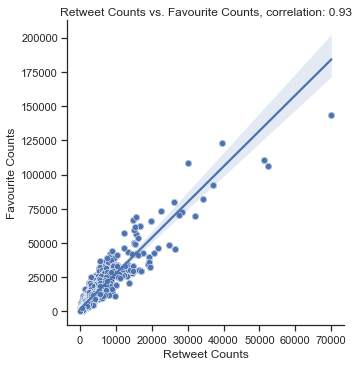

In [519]:
import seaborn as sns
%matplotlib inline

correlation = round(twi_arch_mast['retweet_count'].corr(twi_arch_mast['favorite_count']),2)

#linear model plot to create line of best fit
sns.lmplot(x="retweet_count", y="favorite_count", data=twi_arch_mast)
#plot retweet counts and favourite counts as a scatter plot with line of best fit
ax = sns.scatterplot(x="retweet_count", y="favorite_count", data=twi_arch_mast)

#Add Title
ax.set_title("Retweet Counts vs. Favourite Counts, correlation: " + str(correlation))
#Add x axis label
ax.set_xlabel("Retweet Counts")
#Add y axis label
ax.set_ylabel("Favourite Counts")
